# Image Transformation Techniques for Effective Barcode Scanning
This notebook demonstrates various image transformations such as **Affine Transformation**, **Geometric Transformations** (Translation, Rotation, Scaling), and **Projective Transformation**. Additionally, it includes **Barcode Detection and Recognition** using OpenCV and Pyzbar.

---

## Importing Libraries
The following libraries are required for this notebook:
1. **OpenCV**: For image processing and transformations.
2. **NumPy**: To handle numerical operations and coordinate systems.
3. **Matplotlib**: To display images.
4. **Pyzbar**: To detect and decode barcodes.

Make sure the libraries are installed. You can install them using:

```bash
pip install opencv-python-headless numpy matplotlib pyzba

**Step 1: Import Libraries**

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pyzbar import pyzbar

# Configure Matplotlib for inline display
%matplotlib inline

**Step 2: Barcode Detection and Display Functions** <br>
The following helper functions allow:

- **detectAndRecognizeBarcodes**: Detects barcodes, draws rectangles, and displays information. <br>
- **showImageWithBarcode**: Combines barcode detection and image visualization. <br>

In [2]:
# Function to detect and recognize barcodes, and draw rectangles with text
def detectAndRecognizeBarcodes(image, expected_barcodes=1):
    """
    Detects barcodes in an image, annotates it, and calculates detection accuracy.
    Args:
        image (numpy array): Input image.
        expected_barcodes (int): Number of expected barcodes.
    Returns:
        Annotated image, detection status, and detection accuracy.
    """
    barcodes = pyzbar.decode(image)
    num_detected = len(barcodes)
    
    for barcode in barcodes:
        x, y, w, h = barcode.rect
        barcodeData = barcode.data.decode("utf-8")
        barcodeType = barcode.type

        # Draw rectangle around the barcode
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put the barcode type and data on the image
        text = f"{barcodeType}: {barcodeData} (Box: {x},{y},{w},{h})"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        print(f"Detected Barcode: {text} | Confidence: High | Bounding Box: {x},{y},{w},{h}")

    # Calculate the detection accuracy percentage
    accuracy = (num_detected / expected_barcodes) * 100 if expected_barcodes > 0 else 0
    detection_status = "Detected" if num_detected > 0 else "Not Detected"
    return image, detection_status, accuracy


# Function to display the image with transformations
def showImageWithBarcode(img, title, expected_barcodes=1):
    """
    Detects barcodes and displays the annotated image with grid and title.
    Args:
        img (numpy array): Input image.
        title (str): Title of the image.
        expected_barcodes (int): Number of expected barcodes.
    """
    imgWithBarcodes, detection_status, accuracy = detectAndRecognizeBarcodes(img.copy(), expected_barcodes)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(imgWithBarcodes, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} - Barcode {detection_status} - Accuracy: {accuracy:.2f}%")
    plt.grid(True)
    plt.xticks(np.arange(0, img.shape[1], step=100))
    plt.yticks(np.arange(0, img.shape[0], step=100))
    plt.show()


# Function for Affine Transformation
def affineTransformation(img):
    """
    Applies affine transformation to the input image.
    Args:
        img (numpy array): Input image.
    Returns:
        Transformed image.
    """
    rows, cols, ch = img.shape
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(img, M, (cols, rows))


# Function for Projective Transformation
def projectiveTransformation(img):
    """
    Applies projective (perspective) transformation to the input image.
    Args:
        img (numpy array): Input image.
    Returns:
        Transformed image.
    """
    rows, cols, ch = img.shape
    pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
    pts2 = np.float32([[100, 145], [300, 100], [80, 290], [310, 300]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    return cv2.warpPerspective(img, M, (cols, rows))


**Step 3: Load the Image** <br>
Load an image containing a barcode.

In [3]:
# Load the image
path = "./Resources/One-DimensionalBarCodes.jpg"
img = cv2.imread(path)

if img is None:
    print("Image not found at the specified path.")
else:
    print("Image loaded successfully.")


Image loaded successfully.


**Step 4: Original Image with Barcode Detection** <br>
In this step, the original image is displayed with any detected barcodes highlighted.

Step 1: Original Image
Detected Barcode: CODE39: 3400912345621 (Box: 19,15,0,84) | Confidence: High | Bounding Box: 19,15,0,84


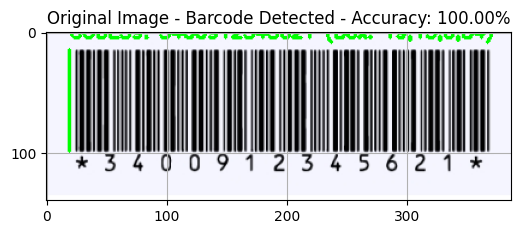

In [4]:
print("Step 1: Original Image")
showImageWithBarcode(img, "Original Image", expected_barcodes=1)


**Step 5: Translated Image** <br>
Translation is a geometric transformation where an image is shifted horizontally and vertically.

The translation matrix:  <br>   <br> 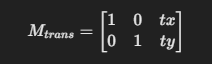

Where **tx** is the shift along the x-axis and **ty** is the shift along the y-axis.

Step 2: Translated Image


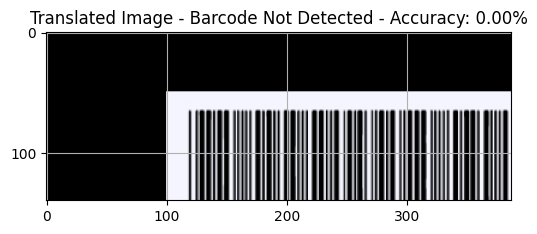

In [5]:
print("Step 2: Translated Image")
rows, cols = img.shape[:2]
M_trans = np.float32([[1, 0, 100], [0, 1, 50]])  # Shift 100px right and 50px down
imgTranslated = cv2.warpAffine(img, M_trans, (cols, rows))
showImageWithBarcode(imgTranslated, "Translated Image", expected_barcodes=1)


**Step 6: Rotated Image** <br>
Image rotation rotates an image around a center point by a given angle.  <br>

The rotation matrix:  <br> <br>
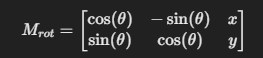

Step 3: Rotated Image


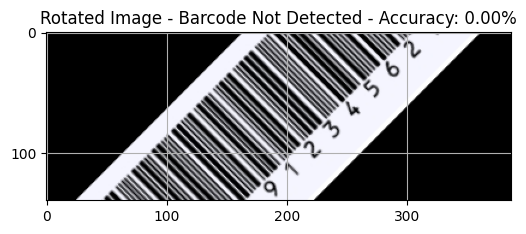

In [6]:
print("Step 3: Rotated Image")
M_rot = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # 45-degree rotation
imgRotated = cv2.warpAffine(img, M_rot, (cols, rows))
showImageWithBarcode(imgRotated, "Rotated Image", expected_barcodes=1)


**Step 7: Scaled Image** <br>
Scaling resizes the image by a factor  **fx** and **fy** for width and height, respectively.

Step 4: Resized Image
Detected Barcode: CODE39: 3400912345621 (Box: 20,46,361,239) | Confidence: High | Bounding Box: 20,46,361,239


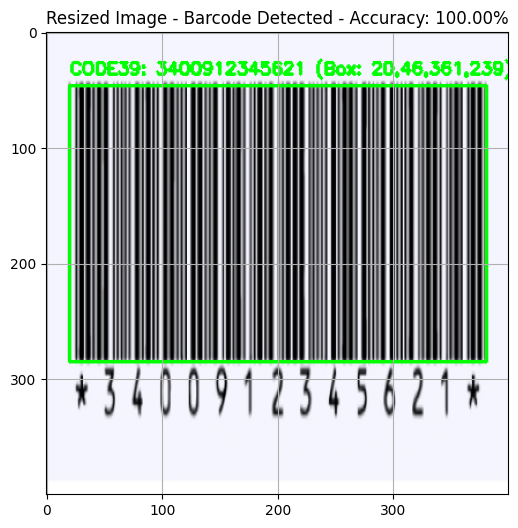

In [7]:
# Step 4: Resizing
print("Step 4: Resized Image")
imgResized = cv2.resize(img, (400, 400))
showImageWithBarcode(imgResized, "Resized Image", expected_barcodes=1)


**Step 8: Affine Transformation** <br>
Affine transformation preserves collinearity and parallelism in images. It maps three source points to three destination points.

Step 5: Affine Transformation


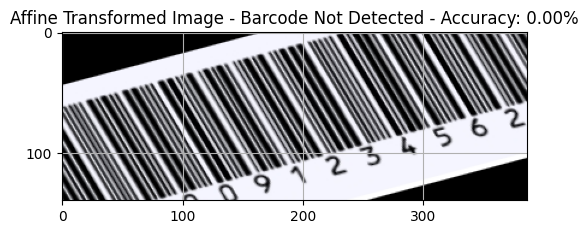

In [8]:
print("Step 5: Affine Transformation")
imgAffine = affineTransformation(img)
showImageWithBarcode(imgAffine, "Affine Transformed Image", expected_barcodes=1)


**Step 9: Projective Transformation** <br>
Projective transformation maps four source points to four destination points and can perform perspective distortion.

Step 6: Projective Transformation


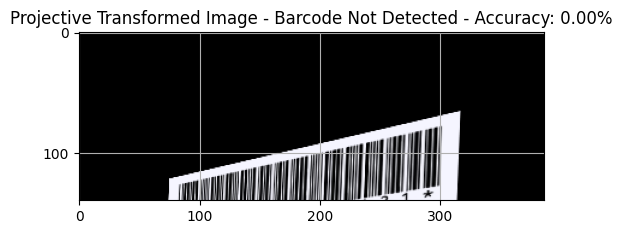

In [9]:
print("Step 6: Projective Transformation")
imgProjective = projectiveTransformation(img)
showImageWithBarcode(imgProjective, "Projective Transformed Image", expected_barcodes=1)


In [10]:
print("All image processing operations, including transformations and barcode detection, are completed.")

All image processing operations, including transformations and barcode detection, are completed.


## Conclusion

This notebook demonstrates how various image transformation techniques can be applied using OpenCV, with the results visualized inline for easy comparison. We explored transformations such as translation, rotation, scaling, affine, and projective transformations, each of which plays a crucial role in manipulating and analyzing images. Additionally, we applied barcode detection using Pyzbar, showcasing how to extract useful information from images in practical applications.

These techniques are fundamental for tasks like image enhancement, feature extraction, and preparing images for further analysis or machine learning models. Understanding these transformations and their applications in computer vision provides a solid foundation for more advanced tasks such as object recognition, image alignment, and augmented reality.
